In [12]:
T_E, C_E = -21.1, 0.233

T_m = 0.

m = (T_m - T_E)/C_E

def C_L(T):
    
    return (T_m - T)/m

In [13]:
def phi_ideal(T, C):
    
    if (C > 0) and (T > T_m - m*C):
        
        return 0.
    
    elif (C > 0) and (T <= T_m - m*C):
        
        return 1. - C/C_L(T)
    
    else:
        
        return 1.

In [14]:
def sample_phi(n, phi):
    
    T = numpy.linspace(T_m + 10., T_E, n)

    C = numpy.linspace(0., C_E, n)

    T_grid = numpy.empty((n, n,))

    C_grid = numpy.empty((n, n,))

    phi_grid = numpy.empty((n, n,))

    for i in range(n):
    
        for j in range(n):
        
            T_grid[i][j] = T[i]
        
            C_grid[i][j] = C[j]
        
            phi_grid[i][j] = phi(T[i], C[j])
            
    return T_grid, C_grid, phi_grid
        
    
T, C, phi = sample_phi(50, phi_ideal)

<IPython.core.display.Javascript object>


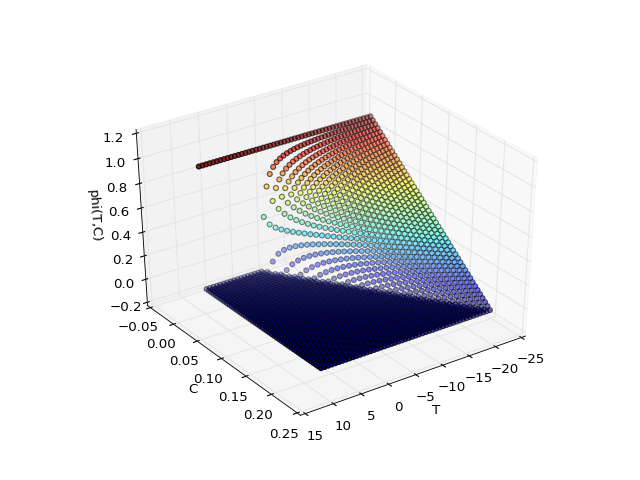

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

def plot_phi(T, C, phi):
    
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(T, C, phi, c=phi)

    ax.set_xlabel('T')

    ax.set_ylabel('C')

    ax.set_zlabel('phi(T,C)')
    

plot_phi(T, C, phi)

How can we fit a differentiable function to this?

Here's an example of trying to use a bivariate spline, which does not work very well.

<IPython.core.display.Javascript object>


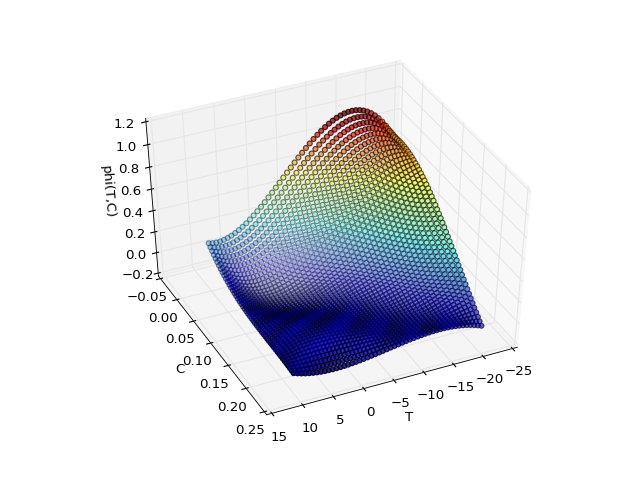

In [16]:
from scipy.interpolate import SmoothBivariateSpline

phi_spline = SmoothBivariateSpline(T.flatten(),
    C.flatten(),
    phi.flatten())

plot_phi(*sample_phi(50, phi_spline))

Indeed, we should not expect a simple spline to do the trick. Perhaps a B-Spline or NURBS could handle it. I would expect NURBS to be capable of making something that looks nice; but we cannot afford to have any patches, i.e. we need a single NURBS to maintain differentiability.